In [38]:
import pandas as pd

In [ ]:
velo_data = pd.read_csv('data/citibike-tripdata.csv', sep=',')
velo_df = velo_data.copy()
velo_df

In [ ]:
velo_df['end station name'].value_counts(normalize=True)

In [4]:
velo_df.drop(['start station id', 'end station id'], axis=1, inplace=True)

In [ ]:
velo_df['age'] = 2018 - velo_df['birth year']
velo_df[velo_df['age'] > 60]['age']

In [40]:
velo_df['starttime'] = pd.to_datetime(velo_df['starttime'])
velo_df['stoptime'] = pd.to_datetime(velo_df['stoptime'])
velo_df['trip duration'] = velo_df['stoptime'] - velo_df['starttime']
velo_df['trip duration'].dt.seconds.iloc[3]//60

7

In [46]:
velo_df['weekday'] = velo_df['starttime'].dt.dayofweek
velo_df['weekend'] = velo_df['weekday'].apply(lambda x: 1 if x == 5 or x == 6 else 0)
velo_df['weekend'].value_counts()


weekend
0    184865
1    115135
Name: count, dtype: int64

In [60]:
def get_time(hour):
    if hour >= 0 and hour <= 6:
        return 'night'
    if hour > 6 and hour <= 12:
        return 'morning'
    if hour > 12 and hour <= 18:
        return 'day'
    if hour > 18 and hour <= 23:
        return 'evening'
velo_df['time_of_day'] = velo_df['starttime'].dt.hour.apply(get_time)
len(velo_df[velo_df['time_of_day'] == 'day']) / len(velo_df[velo_df['time_of_day'] == 'night'])

9.480411004308916

Text(0, 0.5, 'Тип объекта')

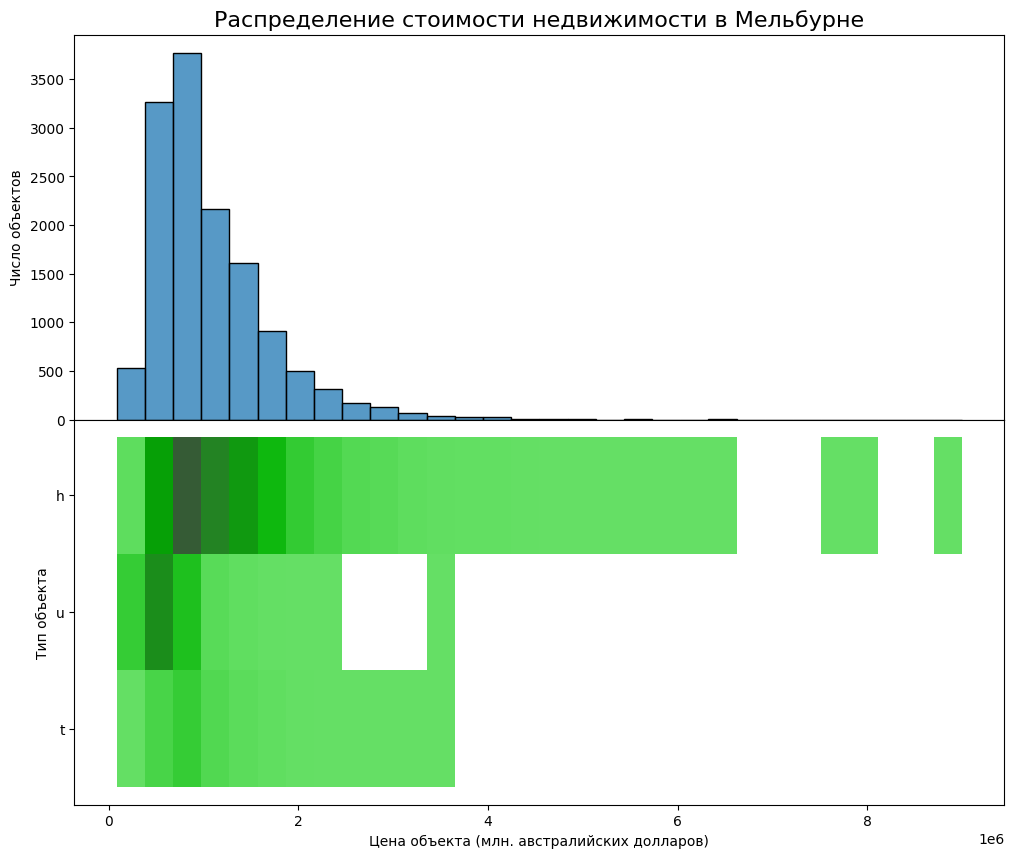

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')